In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [2]:
weights = 0.7
bias = 0.3

X  = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weights*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [6]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None
                    ):
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend()    

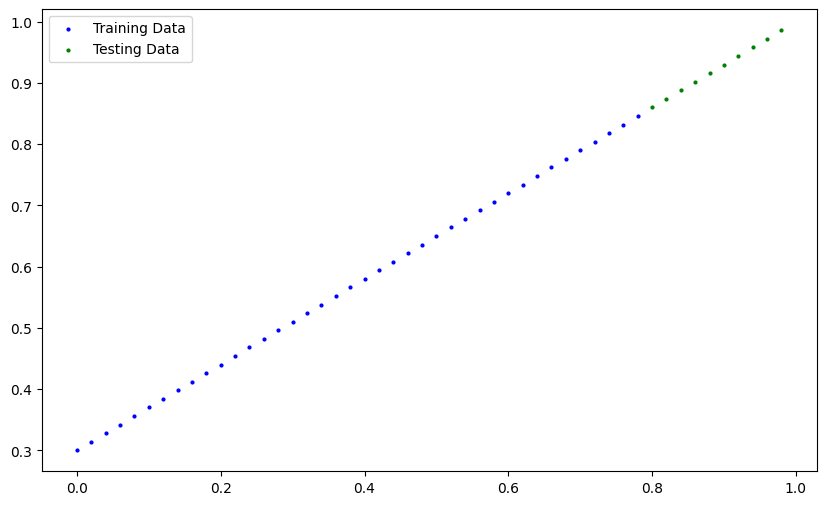

In [7]:
plot_predictions()

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias

In [9]:
torch.manual_seed(42)

model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
model.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [11]:
with torch.inference_mode():
    y_pred = model(X_test)

    y_pred

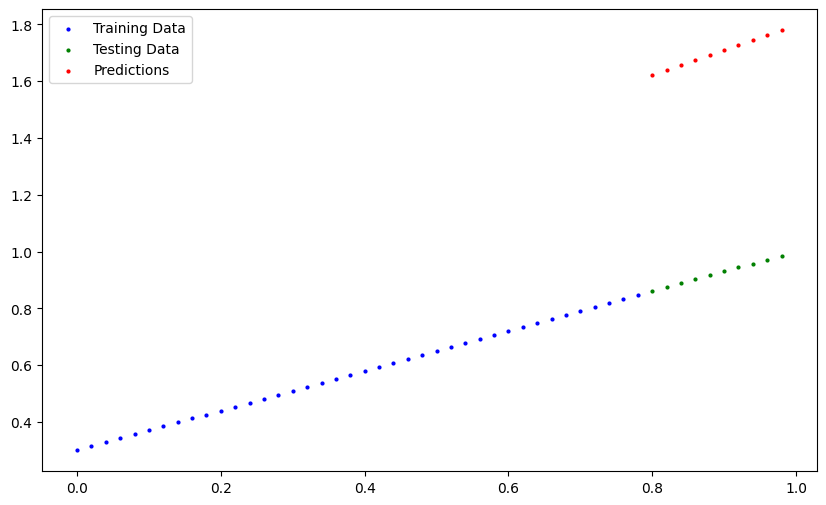

In [12]:
plot_predictions(predictions=y_pred)

In [13]:
learning_rate = 0.01
epochs = 100

In [14]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
torch.manual_seed(42)

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    #puts model in training mode(this is the default state of a model)
    model.train()

    #Forward Pass
    y_pred = model(X_train)

    #Loss Function
    loss = loss_function(y_pred, y_train)

    #Set Gradients to Zero (they accumulate by default)
    optimizer.zero_grad()

    #Back Pass
    loss.backward()

    #Update Parameters
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_function(test_pred, y_test)
    
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch+1}, Loss: {loss}, Test Loss: {test_loss}" )
        print(model.state_dict())

Epoch: 1, Loss: 0.6860889196395874, Test Loss: 0.7637526988983154
OrderedDict({'weight': tensor([0.8784]), 'bias': tensor([0.9050])})
Epoch: 11, Loss: 0.5708791017532349, Test Loss: 0.6290428042411804
OrderedDict({'weight': tensor([0.8394]), 'bias': tensor([0.8050])})
Epoch: 21, Loss: 0.45566922426223755, Test Loss: 0.4943329691886902
OrderedDict({'weight': tensor([0.8004]), 'bias': tensor([0.7050])})
Epoch: 31, Loss: 0.34045934677124023, Test Loss: 0.35962313413619995
OrderedDict({'weight': tensor([0.7614]), 'bias': tensor([0.6050])})
Epoch: 41, Loss: 0.2252494841814041, Test Loss: 0.2249133139848709
OrderedDict({'weight': tensor([0.7224]), 'bias': tensor([0.5050])})
Epoch: 51, Loss: 0.1100396141409874, Test Loss: 0.09020347893238068
OrderedDict({'weight': tensor([0.6834]), 'bias': tensor([0.4050])})
Epoch: 61, Loss: 0.009724985808134079, Test Loss: 0.020998019725084305
OrderedDict({'weight': tensor([0.6539]), 'bias': tensor([0.3200])})
Epoch: 71, Loss: 0.006216754671186209, Test Loss

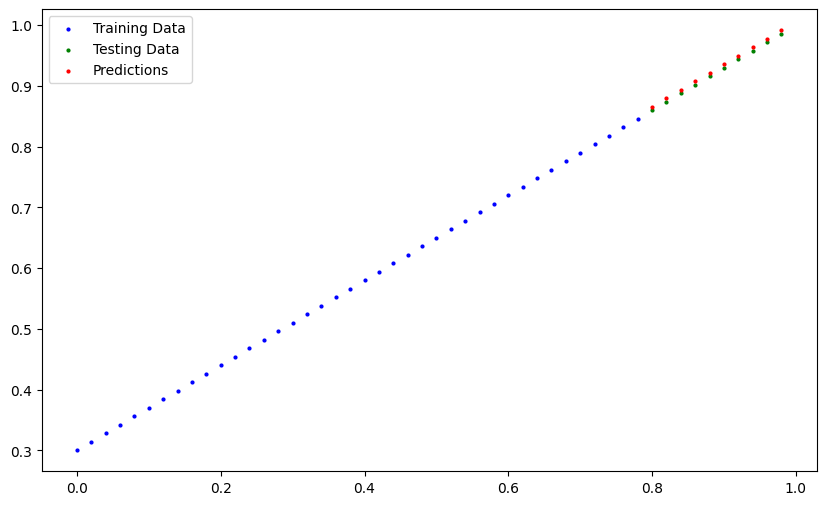

In [16]:
plot_predictions(predictions=test_pred)